# Importing Module and CSV Data

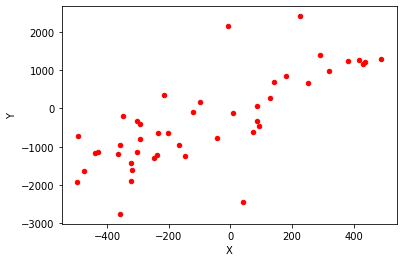

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datasets = pd.read_csv('data.csv',header=None)
datasets.rename(columns = {0:'X',1:'Y'},inplace=True)
datasets.plot(kind='scatter',x='X',y='Y',color='red')
plt.show()

# Handling Missing Values and Outliers

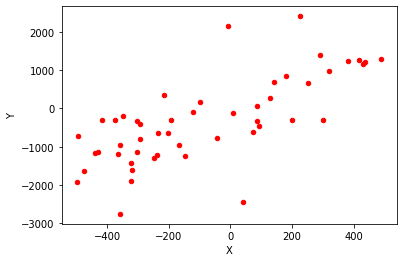

,X,Y
0,-239,-1223.619151
1,201,-309.157237
2,-431,-1146.876354
3,417,1266.915543
4,-215,353.414954
5,-494,-716.404105
6,-295,-790.287449
7,-303,-320.623179
8,-441,-1161.742943
9,141,702.806512


In [3]:
datasets['Y'].fillna(datasets['Y'].mean(), inplace=True)
datasets.plot(kind='scatter',x='X',y='Y',color='red')
plt.show()
datasets

In [4]:
data = datasets['Y']
outliers=[]

def detect_outlier(data_1):
    
    threshold=1.7
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(data)
print(outlier_datapoints)

[-2435.7110364771647, -2753.8334590172944, 2408.007246820724, 2163.2696811947258]


In [5]:
idx = []
for i in outlier_datapoints:
    for j in range(len(datasets)):
        if(datasets.loc[j,'Y']==i):
            idx.append(j)
print(idx)
datasets = datasets.drop(idx)
datasets

[17, 31, 35, 38]


,X,Y
0,-239,-1223.619151
1,201,-309.157237
2,-431,-1146.876354
3,417,1266.915543
4,-215,353.414954
5,-494,-716.404105
6,-295,-790.287449
7,-303,-320.623179
8,-441,-1161.742943
9,141,702.806512


# Normalization of Data

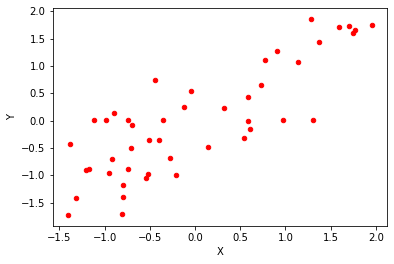

In [6]:
# Z_Score
datasets['X'] = (datasets['X'] - datasets['X'].mean())/datasets['X'].std()
datasets['Y'] = (datasets['Y'] - datasets['Y'].mean())/datasets['Y'].std()
datasets.plot(kind='scatter',x='X',y='Y',color='red')
plt.show()

# Train/Validation Set

In [7]:
train_split = 0.8
val_split = 0.2
idx = datasets.index.values.astype(int)

np.random.seed(94)  
np.random.shuffle(idx)

x_train = np.array([])
y_train = np.array([])
x_val = np.array([])
y_val = np.array([])

train_cnt = round(0.8*46)
val_cnt = round(0.2*46)

for i in range(0,train_cnt):
    x_train = np.append(x_train,datasets.loc[idx[i],'X'])
    y_train = np.append(y_train,datasets.loc[idx[i],'Y'])

for i in range(train_cnt,len(idx)):
    x_val = np.append(x_val,datasets.loc[idx[i],'X'])
    y_val = np.append(y_val,datasets.loc[idx[i],'Y'])




# Linear Regression using Analytical approach

In [8]:

def analytical_approach(xtrain,ytrain):
    x_mean = xtrain.mean()
    y_mean = ytrain.mean()
    upper = 0
    lower = 0
    
    for i in range(len(xtrain)):
        upper = (xtrain[i]-x_mean)*(ytrain[i]-y_mean)
        lower = (xtrain[i]-x_mean)**2
    
    m = upper/lower
    c = y_mean - (m*x_mean)
    
    return m,c
    
m,c = analytical_approach(x_train,y_train)
print(m)
print(c)

0.7896807550707026
0.03821068173845934


In [9]:

def data_divide(xval,yval):
    x = np.ones([len(xval),2])
    y = np.ones([len(yval),1])
    for i in range(len(xval)):
        x[i][1] = xval[i]
        y[i] = yval[i]
    return x,y

x,y = data_divide(x_val,y_val)

In [10]:

def r_squared(theta,X,Y):
    rss,tss = 0,0
    theta = np.transpose(theta)
    y_p = np.matmul(X,theta)
    y_m = Y.mean()
    for i in range(len(Y)):
        rss+=(Y[i]-y_p[i])**2
        
    for i in range(len(Y)):
        tss += (Y[i]-y_m)**2
    r_2 = 1-(rss/tss)
    return r_2[0]
    
theta1 = np.array([[c, m]])
r1 = r_squared(theta1,x,y)*100
print('Accuracy using Analytical approach '+ str(r1))

Accuracy using Analytical approach 84.45465373378767


# Linear Regression using Gradient Descent approach

In [11]:
def error_calculation(X,Y,theta):
    theta = np.transpose(theta)
    y_p = np.matmul(X,theta)
    err = (y_p-Y)
    return np.transpose(err)

In [12]:
def gradient_descent(X,Y):
    theta = np.array([[1, 1]])
    alpha = 0.0001
    m = len(X)
    for i in range(0,100000):
        err = (error_calculation(X,Y,theta))
        theta = theta - alpha*((np.matmul(err,X))/m)
    print(theta[0][0])
    print(theta[0][1])
    return theta

xt,yt = data_divide(x_train,y_train)
theta2 = gradient_descent(xt,yt)
r2 = r_squared(theta2,x,y)*100
print('Accuracy using Gradient Descent approach '+ str(r2))

0.03872269988612251
0.7982061678577493
Accuracy using Gradient Descent approach 84.72676451379847


# Report

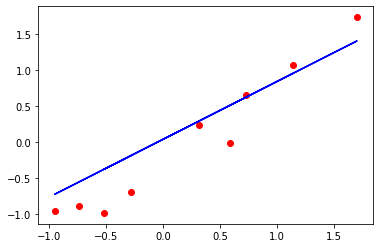

m  0.7982061678577493
c  0.03872269988612251


In [13]:
plt.scatter(x_val,y_val,color = 'red')
xline = x_val
yline = theta2[0][1]*x_val+theta2[0][0]
plt.plot(xline, yline , '-b')
plt.show()
print("m ",end=" ")
print(theta2[0][1])
print("c ", end=" ")
print(theta2[0][0])

# Using Gradient Descent
### m = 0.7982061678577493
### c = 0.03872269988612251
### Accuracy using Gradient Descent approach 84.72676451379847